# Audio Preprocessing

This notebook demonstrates how to preprocess audio files using the CTC-SpeechRefinement package. We'll explore various preprocessing techniques including normalization, silence removal, Voice Activity Detection (VAD), noise reduction, and frequency normalization.

## Setup

First, let's import the necessary libraries and set up the environment.

In [1]:
# Add the project root to the Python path
import sys
import os
sys.path.append(os.path.abspath('..'))

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
import seaborn as sns
from IPython.display import Audio, display
import glob
from pathlib import Path

# Import from the project
from ctc_speech_refinement.core.preprocessing.audio import preprocess_audio, load_audio
from ctc_speech_refinement.core.preprocessing.vad import apply_vad, energy_vad, zcr_vad
from ctc_speech_refinement.core.preprocessing.noise_reduction import reduce_noise
from ctc_speech_refinement.core.preprocessing.frequency_normalization import normalize_frequency

# Set up plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

/home/ngocducpc/miniconda3/envs/speech/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Audio Data

Let's load an audio file and examine its basic properties.

2025-05-07 11:47:39,237 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loading audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:39,827 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loaded audio with shape (213200,) and sample rate 16000


Audio file: ../data/speech2text/input/test1_01.wav
Sample rate: 16000 Hz
Duration: 13.32 seconds
Number of samples: 213200


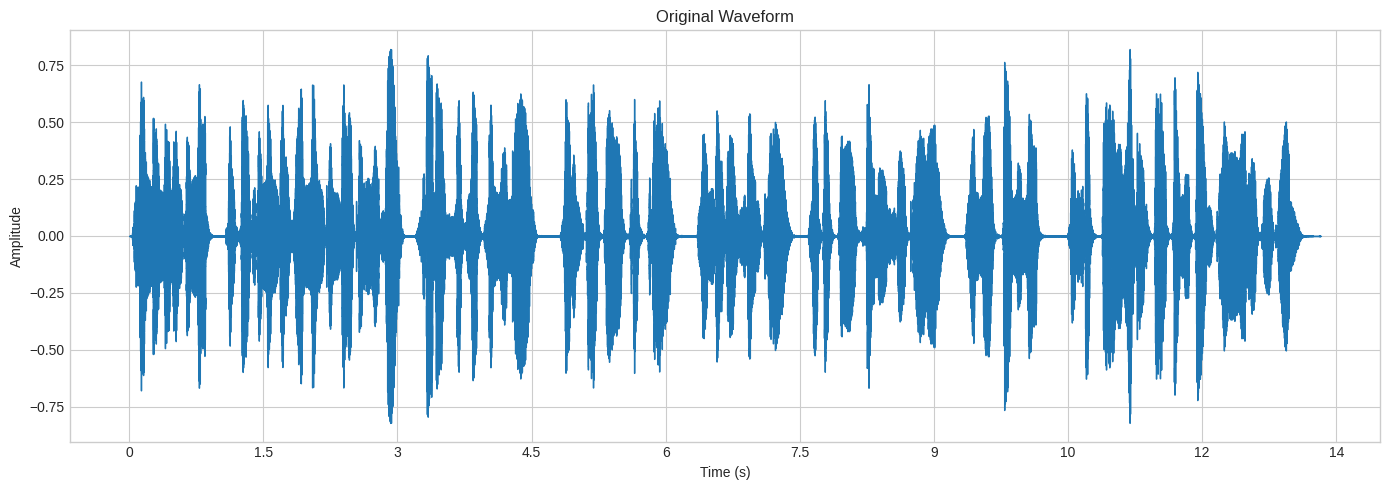

In [2]:
# Define the path to an audio file
audio_file = "../data/speech2text/input/test1_01.wav"  # Path to the audio file

# Load the audio file using our package's function
audio_data, sample_rate = load_audio(audio_file)

# Print basic information
print(f"Audio file: {audio_file}")
print(f"Sample rate: {sample_rate} Hz")
print(f"Duration: {len(audio_data) / sample_rate:.2f} seconds")
print(f"Number of samples: {len(audio_data)}")

# Play the audio
display(Audio(audio_data, rate=sample_rate))

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.title('Original Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## 1. Normalization

Let's normalize the audio data to have a maximum absolute amplitude of 1.0.

2025-05-07 11:47:40,069 - ctc_speech_refinement.core.preprocessing.audio - INFO - Preprocessing audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:40,070 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loading audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:40,073 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loaded audio with shape (213200,) and sample rate 16000
2025-05-07 11:47:40,073 - ctc_speech_refinement.core.preprocessing.audio - INFO - Normalizing audio data
2025-05-07 11:47:40,074 - ctc_speech_refinement.core.preprocessing.audio - INFO - Preprocessed audio shape: (213200,)


Original audio min: -0.794630, max: 0.821832
Normalized audio min: -6.162227, max: 6.372773


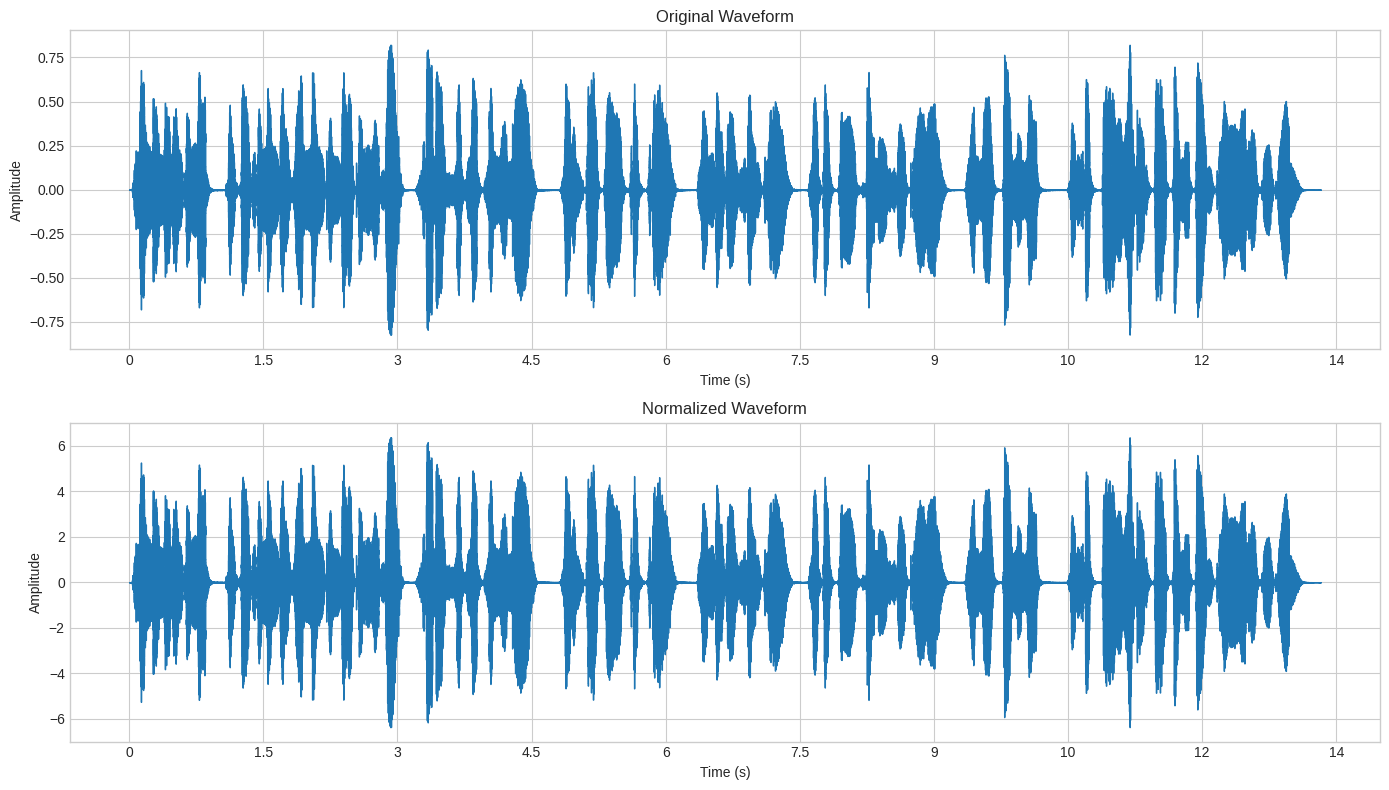

In [3]:
# Preprocess the audio with normalization only
normalized_audio, _ = preprocess_audio(
    audio_file, 
    normalize=True,
    remove_silence_flag=False,
    apply_vad_flag=False,
    reduce_noise_flag=False,
    normalize_frequency_flag=False
)

# Print information about the normalized audio
print(f"Original audio min: {np.min(audio_data):.6f}, max: {np.max(audio_data):.6f}")
print(f"Normalized audio min: {np.min(normalized_audio):.6f}, max: {np.max(normalized_audio):.6f}")

# Play the normalized audio
display(Audio(normalized_audio, rate=sample_rate))

# Plot the original and normalized waveforms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

librosa.display.waveshow(audio_data, sr=sample_rate, ax=ax1)
ax1.set_title('Original Waveform')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

librosa.display.waveshow(normalized_audio, sr=sample_rate, ax=ax2)
ax2.set_title('Normalized Waveform')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

## 2. Silence Removal

Let's remove silent regions from the audio.

2025-05-07 11:47:40,541 - ctc_speech_refinement.core.preprocessing.audio - INFO - Preprocessing audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:40,542 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loading audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:40,545 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loaded audio with shape (213200,) and sample rate 16000
2025-05-07 11:47:40,545 - ctc_speech_refinement.core.preprocessing.audio - INFO - Removing silence from audio
2025-05-07 11:47:40,661 - ctc_speech_refinement.core.preprocessing.audio - INFO - Normalizing audio data
2025-05-07 11:47:40,662 - ctc_speech_refinement.core.preprocessing.audio - INFO - Preprocessed audio shape: (211456,)


Original audio duration: 13.32 seconds
Audio duration after silence removal: 13.22 seconds
Reduction: 0.82%


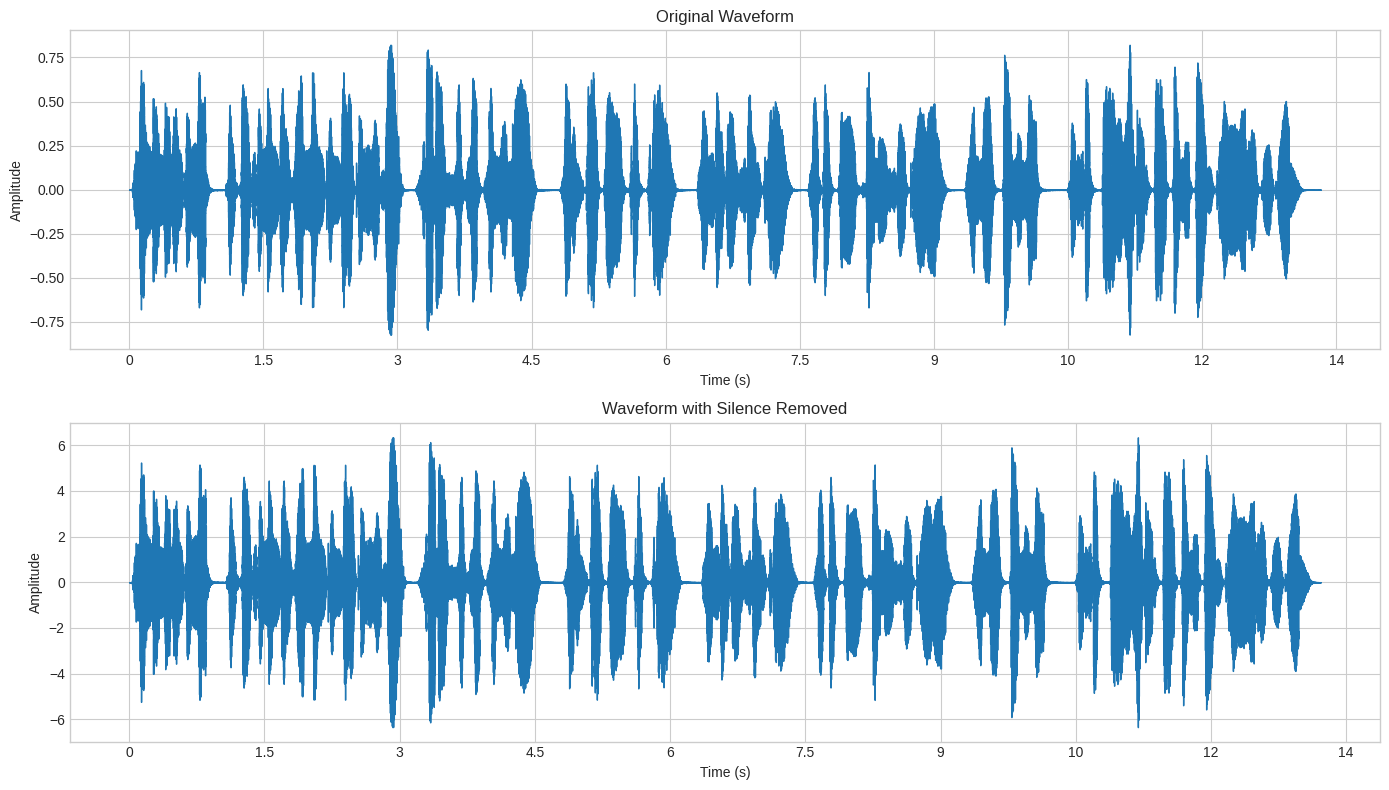

In [4]:
# Preprocess the audio with silence removal
no_silence_audio, _ = preprocess_audio(
    audio_file, 
    normalize=True,
    remove_silence_flag=True,
    apply_vad_flag=False,
    reduce_noise_flag=False,
    normalize_frequency_flag=False
)

# Print information about the audio with silence removed
print(f"Original audio duration: {len(audio_data) / sample_rate:.2f} seconds")
print(f"Audio duration after silence removal: {len(no_silence_audio) / sample_rate:.2f} seconds")
print(f"Reduction: {(1 - len(no_silence_audio) / len(audio_data)) * 100:.2f}%")

# Play the audio with silence removed
display(Audio(no_silence_audio, rate=sample_rate))

# Plot the original and silence-removed waveforms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

librosa.display.waveshow(audio_data, sr=sample_rate, ax=ax1)
ax1.set_title('Original Waveform')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

librosa.display.waveshow(no_silence_audio, sr=sample_rate, ax=ax2)
ax2.set_title('Waveform with Silence Removed')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

## 3. Voice Activity Detection (VAD)

Let's apply Voice Activity Detection to keep only the speech segments.

2025-05-07 11:47:41,161 - ctc_speech_refinement.core.preprocessing.audio - INFO - Preprocessing audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:41,162 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loading audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:41,165 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loaded audio with shape (213200,) and sample rate 16000
2025-05-07 11:47:41,165 - ctc_speech_refinement.core.preprocessing.audio - INFO - Applying Voice Activity Detection with method: energy
2025-05-07 11:47:41,165 - ctc_speech_refinement.core.preprocessing.vad - INFO - Applying VAD using energy method
2025-05-07 11:47:41,165 - ctc_speech_refinement.core.preprocessing.vad - INFO - Performing energy-based VAD
2025-05-07 11:47:41,166 - ctc_speech_refinement.core.preprocessing.vad - INFO - Detected 14 speech regions
2025-05-07 11:47:41,176 - ctc_speech_refinement.core.preprocessing.vad - INFO - Extracted speech audio with sh

Original audio duration: 13.32 seconds
Audio duration after VAD: 10.98 seconds
Reduction: 17.63%


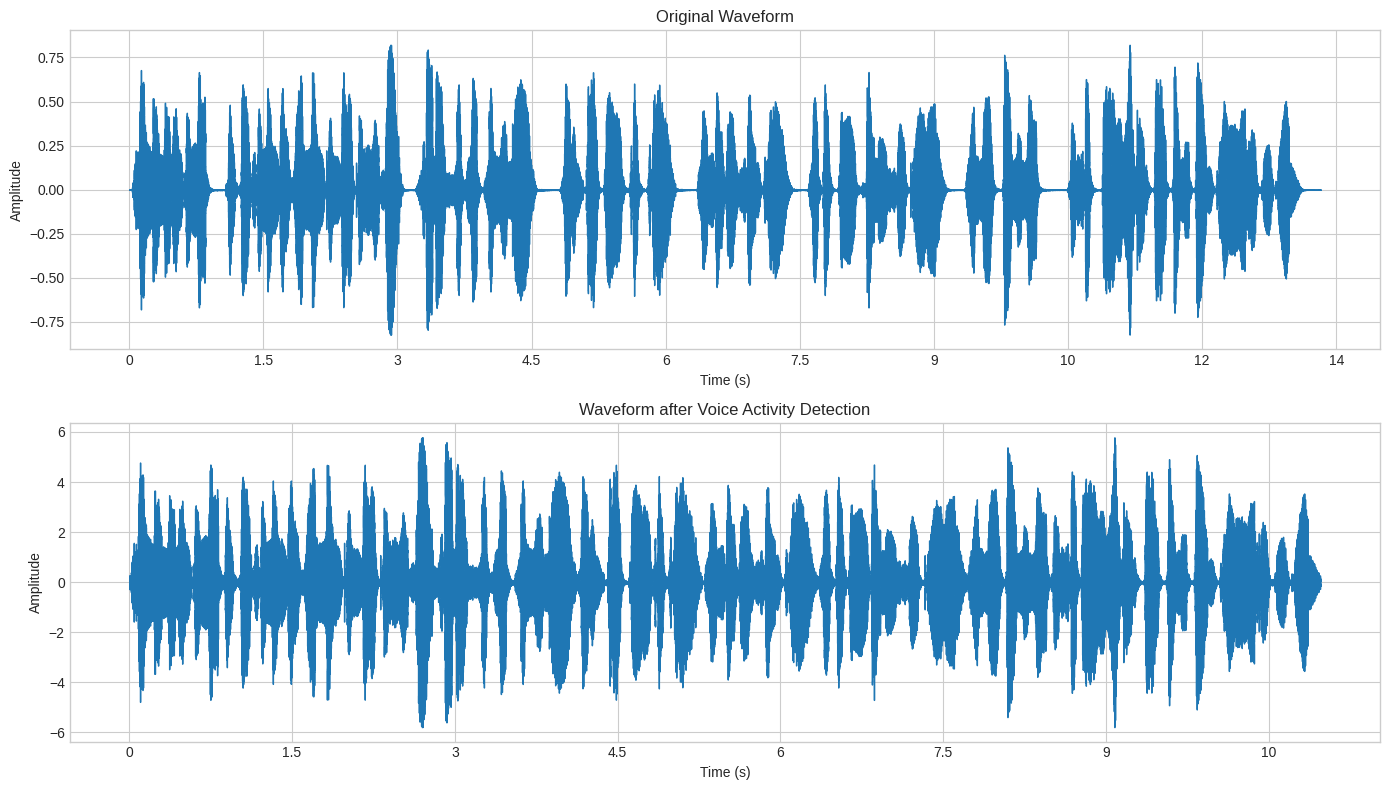

In [5]:
# Preprocess the audio with VAD
vad_audio, _ = preprocess_audio(
    audio_file, 
    normalize=True,
    remove_silence_flag=False,
    apply_vad_flag=True,
    vad_method="energy",
    reduce_noise_flag=False,
    normalize_frequency_flag=False
)

# Print information about the audio after VAD
print(f"Original audio duration: {len(audio_data) / sample_rate:.2f} seconds")
print(f"Audio duration after VAD: {len(vad_audio) / sample_rate:.2f} seconds")
print(f"Reduction: {(1 - len(vad_audio) / len(audio_data)) * 100:.2f}%")

# Play the audio after VAD
display(Audio(vad_audio, rate=sample_rate))

# Plot the original and VAD-processed waveforms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

librosa.display.waveshow(audio_data, sr=sample_rate, ax=ax1)
ax1.set_title('Original Waveform')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

librosa.display.waveshow(vad_audio, sr=sample_rate, ax=ax2)
ax2.set_title('Waveform after Voice Activity Detection')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

## 4. Noise Reduction

Let's apply noise reduction to the audio.

2025-05-07 11:47:41,685 - ctc_speech_refinement.core.preprocessing.audio - INFO - Preprocessing audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:41,686 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loading audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:41,689 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loaded audio with shape (213200,) and sample rate 16000
2025-05-07 11:47:41,689 - ctc_speech_refinement.core.preprocessing.audio - INFO - Applying noise reduction with method: spectral_subtraction
2025-05-07 11:47:41,689 - ctc_speech_refinement.core.preprocessing.noise_reduction - INFO - Reducing noise using spectral_subtraction method
2025-05-07 11:47:41,690 - ctc_speech_refinement.core.preprocessing.noise_reduction - INFO - Applying spectral subtraction
2025-05-07 11:47:41,718 - ctc_speech_refinement.core.preprocessing.noise_reduction - INFO - Spectral subtraction completed
2025-05-07 11:47:41,718 - ctc_speech_refinement

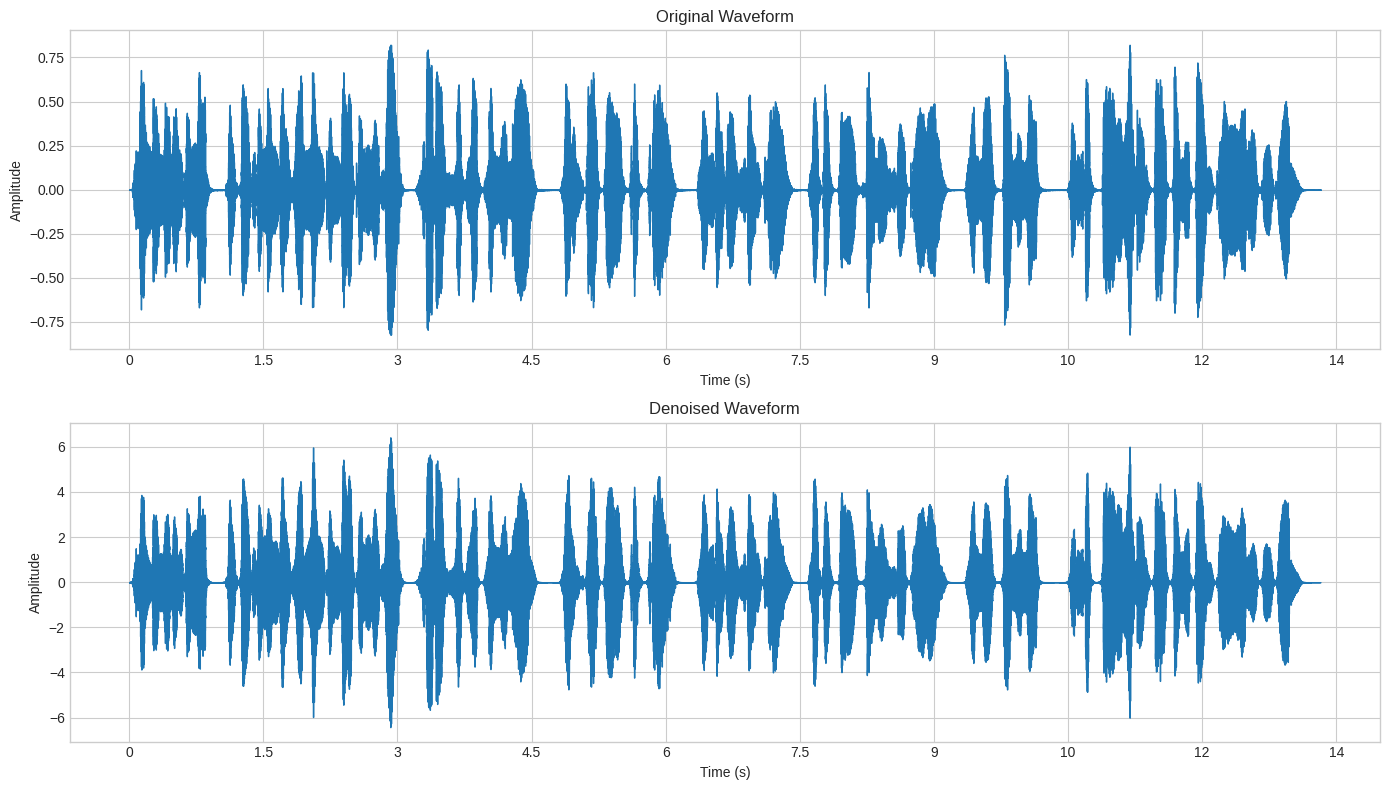

In [6]:
# Preprocess the audio with noise reduction
denoised_audio, _ = preprocess_audio(
    audio_file, 
    normalize=True,
    remove_silence_flag=False,
    apply_vad_flag=False,
    reduce_noise_flag=True,
    noise_reduction_method="spectral_subtraction",
    normalize_frequency_flag=False
)

# Play the denoised audio
display(Audio(denoised_audio, rate=sample_rate))

# Plot the original and denoised waveforms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

librosa.display.waveshow(audio_data, sr=sample_rate, ax=ax1)
ax1.set_title('Original Waveform')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

librosa.display.waveshow(denoised_audio, sr=sample_rate, ax=ax2)
ax2.set_title('Denoised Waveform')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

## 5. Frequency Normalization

Let's apply frequency normalization to the audio.

2025-05-07 11:47:42,203 - ctc_speech_refinement.core.preprocessing.audio - INFO - Preprocessing audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:42,203 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loading audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:42,206 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loaded audio with shape (213200,) and sample rate 16000
2025-05-07 11:47:42,206 - ctc_speech_refinement.core.preprocessing.audio - INFO - Applying frequency normalization with method: bandpass
2025-05-07 11:47:42,206 - ctc_speech_refinement.core.preprocessing.frequency_normalization - INFO - Normalizing frequency using bandpass method
2025-05-07 11:47:42,207 - ctc_speech_refinement.core.preprocessing.frequency_normalization - WARNING - high_freq (8000.0 Hz) exceeds Nyquist frequency (8000.0 Hz). Setting to 7900.0 Hz.
2025-05-07 11:47:42,207 - ctc_speech_refinement.core.preprocessing.frequency_normalization - INFO - Applyin

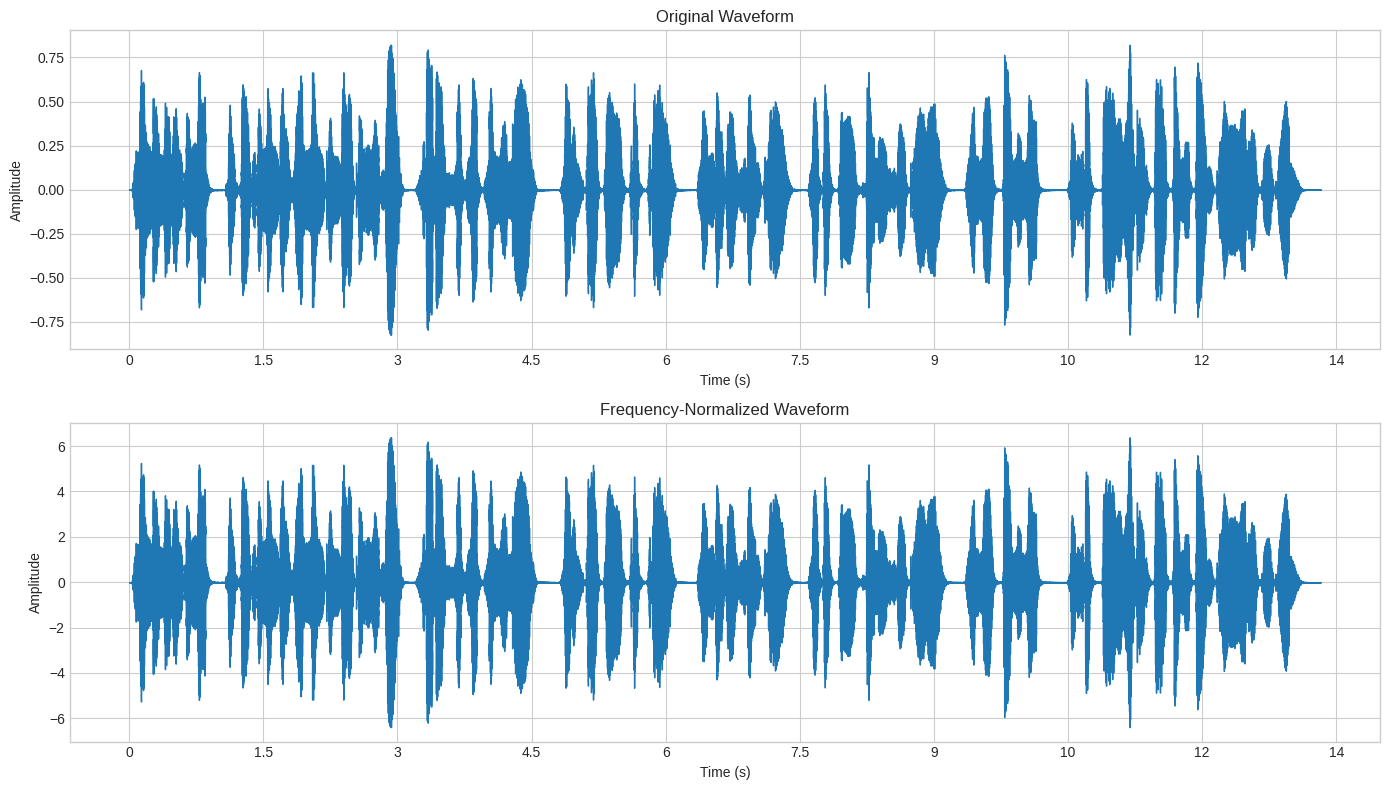

In [7]:
# Preprocess the audio with frequency normalization
freq_normalized_audio, _ = preprocess_audio(
    audio_file, 
    normalize=True,
    remove_silence_flag=False,
    apply_vad_flag=False,
    reduce_noise_flag=False,
    normalize_frequency_flag=True,
    frequency_normalization_method="bandpass"
)

# Play the frequency-normalized audio
display(Audio(freq_normalized_audio, rate=sample_rate))

# Plot the original and frequency-normalized waveforms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

librosa.display.waveshow(audio_data, sr=sample_rate, ax=ax1)
ax1.set_title('Original Waveform')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

librosa.display.waveshow(freq_normalized_audio, sr=sample_rate, ax=ax2)
ax2.set_title('Frequency-Normalized Waveform')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

## 6. Combined Preprocessing

Let's apply all preprocessing steps together.

2025-05-07 11:47:42,700 - ctc_speech_refinement.core.preprocessing.audio - INFO - Preprocessing audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:42,700 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loading audio file: ../data/speech2text/input/test1_01.wav
2025-05-07 11:47:42,703 - ctc_speech_refinement.core.preprocessing.audio - INFO - Loaded audio with shape (213200,) and sample rate 16000
2025-05-07 11:47:42,704 - ctc_speech_refinement.core.preprocessing.audio - INFO - Applying frequency normalization with method: bandpass
2025-05-07 11:47:42,704 - ctc_speech_refinement.core.preprocessing.frequency_normalization - INFO - Normalizing frequency using bandpass method
2025-05-07 11:47:42,704 - ctc_speech_refinement.core.preprocessing.frequency_normalization - WARNING - high_freq (8000.0 Hz) exceeds Nyquist frequency (8000.0 Hz). Setting to 7900.0 Hz.
2025-05-07 11:47:42,704 - ctc_speech_refinement.core.preprocessing.frequency_normalization - INFO - Applyin

Original audio duration: 13.32 seconds
Fully processed audio duration: 10.75 seconds
Reduction: 19.31%


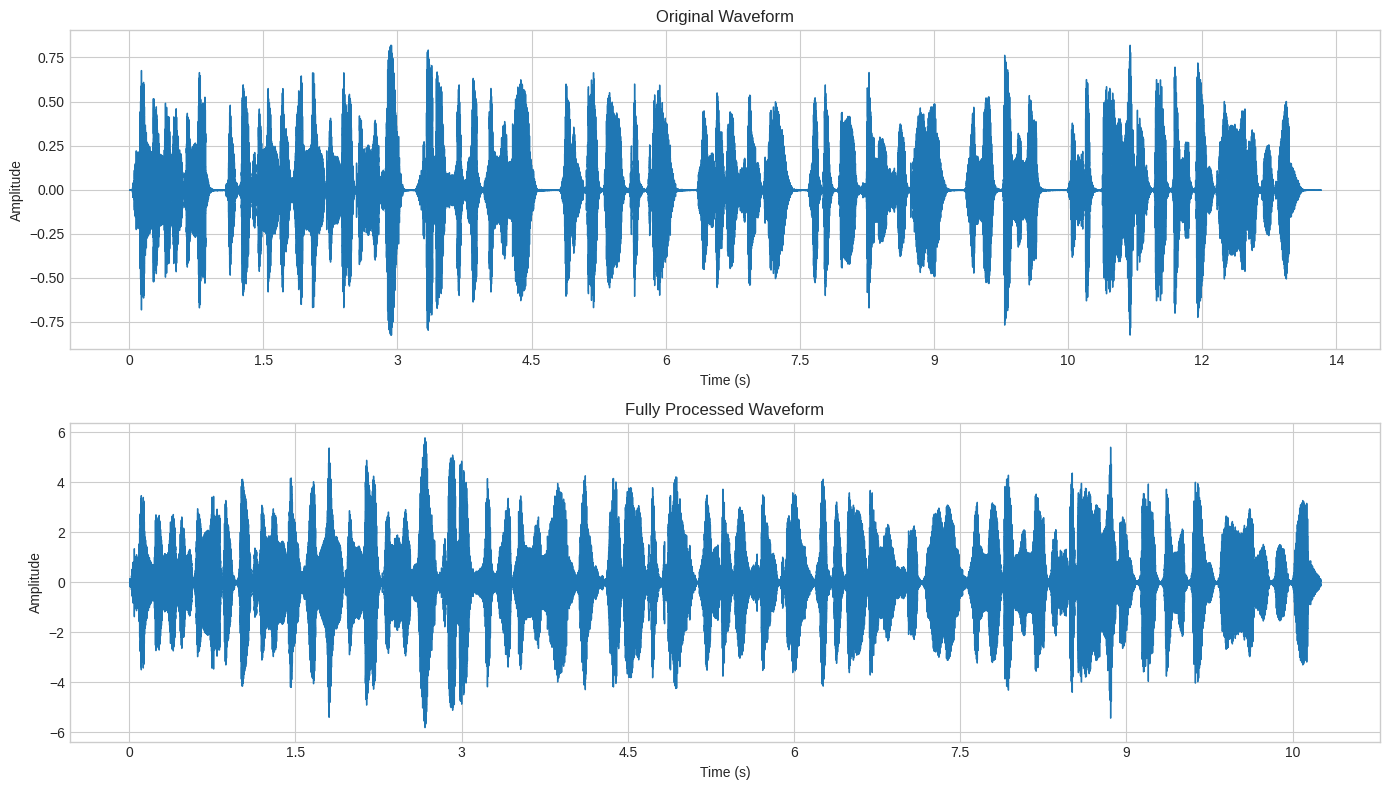

In [8]:
# Apply all preprocessing steps
fully_processed_audio, _ = preprocess_audio(
    audio_file, 
    normalize=True,
    remove_silence_flag=True,
    apply_vad_flag=True,
    vad_method="energy",
    reduce_noise_flag=True,
    noise_reduction_method="spectral_subtraction",
    normalize_frequency_flag=True,
    frequency_normalization_method="bandpass"
)

# Print information about the fully processed audio
print(f"Original audio duration: {len(audio_data) / sample_rate:.2f} seconds")
print(f"Fully processed audio duration: {len(fully_processed_audio) / sample_rate:.2f} seconds")
print(f"Reduction: {(1 - len(fully_processed_audio) / len(audio_data)) * 100:.2f}%")

# Play the fully processed audio
display(Audio(fully_processed_audio, rate=sample_rate))

# Plot the original and fully processed waveforms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

librosa.display.waveshow(audio_data, sr=sample_rate, ax=ax1)
ax1.set_title('Original Waveform')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

librosa.display.waveshow(fully_processed_audio, sr=sample_rate, ax=ax2)
ax2.set_title('Fully Processed Waveform')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we've demonstrated various audio preprocessing techniques using the CTC-SpeechRefinement package. We've explored normalization, silence removal, Voice Activity Detection (VAD), noise reduction, and frequency normalization. These preprocessing steps can significantly improve the quality of audio data for speech recognition tasks by removing noise, silence, and irrelevant frequency components.